<a href="https://colab.research.google.com/github/VarunNangalia/Hackathon-Loan/blob/master/Hackathon_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hackathon-Loan Prediction

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from scipy import stats
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score,confusion_matrix,accuracy_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer

In [218]:
df_train_data=pd.read_csv('train_ctrUa4K.csv')
df_test_data=pd.read_csv('test_lAUu6dG.csv')
df_train_data.head()

Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y

[5 rows x 13 columns]

In [219]:
print(df_train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


There are 7 Columns with missing values

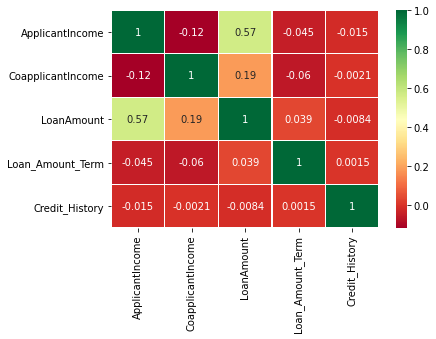

In [220]:
sns.heatmap(df_train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig.set_size_inches(10,8)
plt.show()



1.   LoanAmount and Application Income have moderate amount of Possitive Correlation depicting that a person with high income will demand for a greater amount of Loan.  
2.   Rest of the columns do not depict much correlation



In [221]:
df_test_data.head()

Loan_ID Gender Married  ... Loan_Amount_Term Credit_History Property_Area
0  LP001015   Male     Yes  ...            360.0            1.0         Urban
1  LP001022   Male     Yes  ...            360.0            1.0         Urban
2  LP001031   Male     Yes  ...            360.0            1.0         Urban
3  LP001035   Male     Yes  ...            360.0            NaN         Urban
4  LP001051   Male      No  ...            360.0            1.0         Urban

[5 rows x 12 columns]

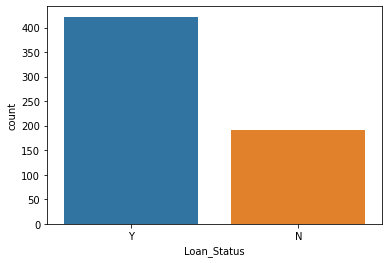

In [222]:
sns.countplot(data =df_train_data, x='Loan_Status')
plt.show()

It is evident that more applicants were provided loan than not yet this is not a case of Imbalance Dataset.

In [223]:
df_train_data.drop(['Loan_ID'],axis=1,inplace=True)
df_train_data_con = df_train_data.select_dtypes(include=np.number)
df_train_data_con

ApplicantIncome  CoapplicantIncome  ...  Loan_Amount_Term  Credit_History
0               5849                0.0  ...             360.0             1.0
1               4583             1508.0  ...             360.0             1.0
2               3000                0.0  ...             360.0             1.0
3               2583             2358.0  ...             360.0             1.0
4               6000                0.0  ...             360.0             1.0
..               ...                ...  ...               ...             ...
609             2900                0.0  ...             360.0             1.0
610             4106                0.0  ...             180.0             1.0
611             8072              240.0  ...             360.0             1.0
612             7583                0.0  ...             360.0             1.0
613             4583                0.0  ...             360.0             0.0

[614 rows x 5 columns]

In [224]:
df_train_data_cat=df_train_data.select_dtypes(exclude=np.number)
df_train_data_cat

Gender Married Dependents  ... Self_Employed Property_Area Loan_Status
0      Male      No          0  ...            No         Urban           Y
1      Male     Yes          1  ...            No         Rural           N
2      Male     Yes          0  ...           Yes         Urban           Y
3      Male     Yes          0  ...            No         Urban           Y
4      Male      No          0  ...            No         Urban           Y
..      ...     ...        ...  ...           ...           ...         ...
609  Female      No          0  ...            No         Rural           Y
610    Male     Yes         3+  ...            No         Rural           Y
611    Male     Yes          1  ...            No         Urban           Y
612    Male     Yes          2  ...            No         Urban           Y
613  Female      No          0  ...           Yes     Semiurban           N

[614 rows x 7 columns]

ApplicantIncome


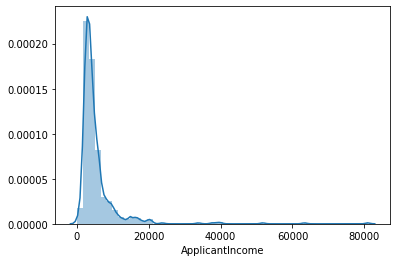

6.539513113994625
CoapplicantIncome


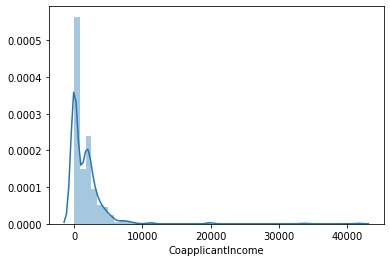

7.491531216657306
LoanAmount


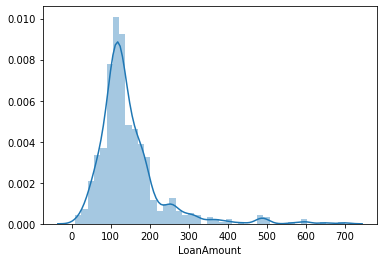

2.677551679256059
Loan_Amount_Term


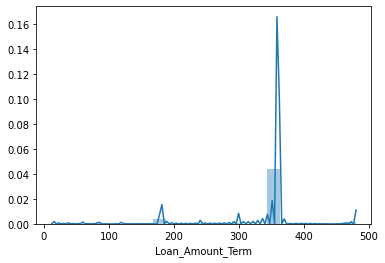

-2.362414124216269
Credit_History


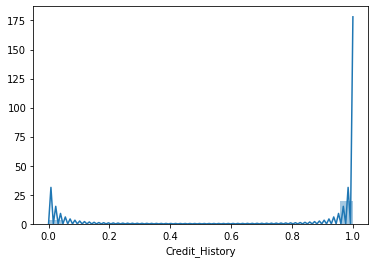

-1.8823610612186696


In [225]:
# to check the data distribution in numerical values
for i in df_train_data_con.columns:
  print(i)
  sns.distplot(df_train_data_con[i])
  plt.show()
  print(df_train_data_con[i].skew())

 

*   There are 5 columns which are considered as Continous. However with further exploring we come to know that columns "Loan_Amount_Term" and "Credit_History" are categorical columns.
*   Columns 'Applicant_Income' and 'Coapplicant_Income' are Possitvely Skewed and we will have to treat that. We can either Scaler our data or use logarithmic transformation for them
*   Column 'Loan_Amount' is not much skewed
 

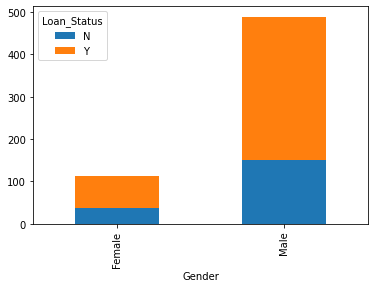

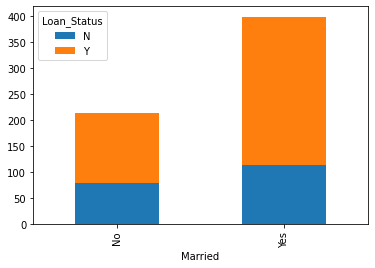

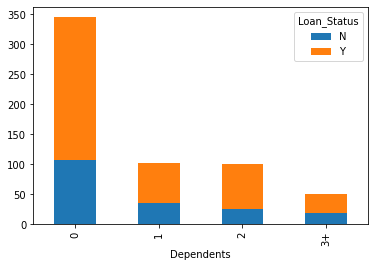

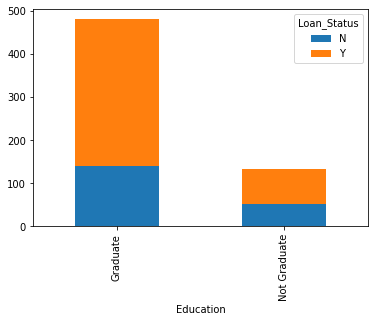

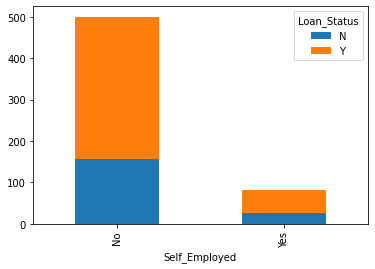

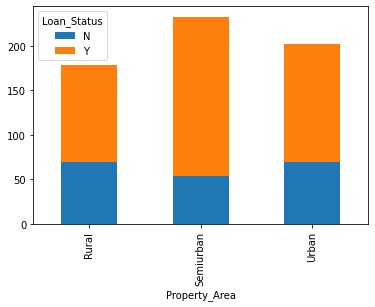

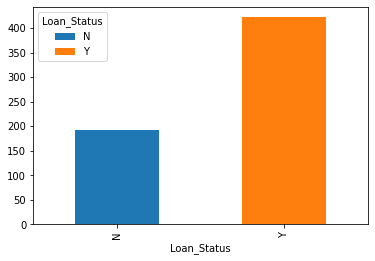

In [226]:
for i in df_train_data_cat.columns:
  df_train_data_cat.groupby(i)['Loan_Status'].value_counts().unstack().plot(kind='bar',stacked=True)

From above we can notice

*   Male Applicants are more than Female Applicants
*   Married applicants have a higher chance of getting a loan than Unmarried. This could due to the reason that Married Applicants have Dual Income's and thus it is safer to provide them a Loan 
*   As the dependency increases the probability of getting a loan decreases
*   Applicants with 0 dependencies have requested more for a loan
*   Probability of a Graduate getting a loan is higher than not a Graduate
*   Applicants seeking loan are the highest from Semi-Urban Region

PS- Alternatively we can also use Sweetviz library in Python for EDA

In [227]:
y_df_train_data=df_train_data['Loan_Status'].copy()
y_df_train_data.replace(['N','Y'],[0,1],inplace=True)
df_train_data.drop('Loan_Status',axis=1,inplace=True)
df_test_data.drop(['Loan_ID'],axis=1,inplace=True)

Creating our basic training and testing data by dropping the target column and unique id column

In [228]:
print('LoanAmount median is',df_train_data['LoanAmount'].median())
print('Gender mode',df_train_data['Gender'].mode())
print('Dependents mode',df_train_data['Dependents'].mode())
print('Married mode',df_train_data['Married'].mode())
print('Self_Employed mode',df_train_data['Self_Employed'].mode())
print('Loan_Amount_Term mode',df_train_data['Loan_Amount_Term'].mode())
print('Credit_History mode',df_train_data['Credit_History'].mode())

LoanAmount median is 128.0
Gender mode 0    Male
dtype: object
Dependents mode 0    0
dtype: object
Married mode 0    Yes
dtype: object
Self_Employed mode 0    No
dtype: object
Loan_Amount_Term mode 0    360.0
dtype: float64
Credit_History mode 0    1.0
dtype: float64


We will now Fill Missing Values. For Categorical values we have filled it using Mode of that column and for Continous we have filled it with Median

In [229]:
df_train_data['Gender']=df_train_data['Gender'].fillna('Male')
df_train_data['Dependents']=df_train_data['Dependents'].fillna('0')
df_train_data['Married']=df_train_data['Married'].fillna("Yes")
df_train_data['Self_Employed']=df_train_data['Self_Employed'].fillna("No")
df_train_data['Loan_Amount_Term']=df_train_data['Loan_Amount_Term'].fillna(360)
df_train_data['Credit_History']=df_train_data['Credit_History'].fillna(1)
df_train_data['LoanAmount']=df_train_data['LoanAmount'].fillna(df_train_data['LoanAmount'].median())
print(df_train_data.isnull().sum())

#Test Data
df_test_data['Gender']=df_test_data['Gender'].fillna('Male')
df_test_data['Dependents']=df_test_data['Dependents'].fillna('0')
df_test_data['Married']=df_test_data['Married'].fillna("Yes")
df_test_data['Self_Employed']=df_test_data['Self_Employed'].fillna("No")
df_test_data['Loan_Amount_Term']=df_test_data['Loan_Amount_Term'].fillna(360)
df_test_data['Credit_History']=df_test_data['Credit_History'].fillna(1)
df_test_data['LoanAmount']=df_test_data['LoanAmount'].fillna(df_train_data['LoanAmount'].median())
print(df_test_data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


#Data Preprocessing

After filling in our missing values we now move to feature engineering

In [230]:
df_train_data['TotalIncome']=df_train_data['ApplicantIncome']+df_train_data['CoapplicantIncome']
df_train_data['ApplicantCoverageRatio']=df_train_data['ApplicantIncome']/df_train_data['LoanAmount']
df_train_data['TotalCoverageRatio']=df_train_data['TotalIncome']/df_train_data['LoanAmount']
df_train_data['LoanPerMonth']=df_train_data['LoanAmount']/df_train_data['Loan_Amount_Term']

#Test Data
df_test_data['TotalIncome']=df_test_data['ApplicantIncome']+df_test_data['CoapplicantIncome']
df_test_data['ApplicantCoverageRatio']=df_test_data['ApplicantIncome']/df_test_data['LoanAmount']
df_test_data['TotalCoverageRatio']=df_test_data['TotalIncome']/df_test_data['LoanAmount']
df_test_data['LoanPerMonth']=df_test_data['LoanAmount']/df_test_data['Loan_Amount_Term']

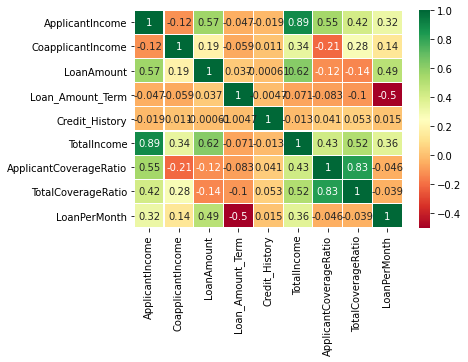

<Figure size 1440x1080 with 0 Axes>

In [231]:
sns.heatmap(df_train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.figure(figsize=(20,15))
plt.show()

We have added 4 columns which are as follows-

*   TotalIncome- This signifies the Total Income of the Applicant along with the Coapplicants Income
*   ApplicantCoverageRatio- This signifies the number of times the loan be be repaid in comparison to the Applicants Individual Income
*   TotalCoverageRatio=This signifies the number of times the loan be be repaid in comparison to the Applicants Total Income
*   LoanPerMonth= Here we are ammortizing the loan amount over the loan tenure

PS- After adding columns we again find correlation to check if there is Multi Colinearity among the columns.Here we noticed 4 columns with Multi Colinearity hence we will have to drop either of the columns.

In [232]:
df_train_data.drop(['ApplicantIncome','ApplicantCoverageRatio'],axis=1,inplace=True)
df_test_data.drop(['ApplicantIncome','ApplicantCoverageRatio'],axis=1,inplace=True)

In [233]:
dummies_cols=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Amount_Term', 'Credit_History','Property_Area']
for i in dummies_cols:
  X_Dummy=pd.get_dummies(df_train_data[i],prefix=i)#XGBoost required that all columns are unique so that is why when we do get dummies for One hot encoding then we have to use prefix in it
  df_train_data = pd.concat([df_train_data,X_Dummy], axis=1)
  df_train_data.drop([i],axis=1,inplace=True)#Altrenatively we could also use 'drop_first=True' in pd.get_dummies as a hyperparameter

Using one hot encoding on Categorical Columns

In [234]:
dummies_cols=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Amount_Term', 'Credit_History','Property_Area']
for i in dummies_cols:
  X_Dummy=pd.get_dummies(df_test_data[i],prefix=i)#XGBoost required that all columns are unique so that is why when we do get dummies for One hot encoding then we have to use prefix in it
  df_test_data = pd.concat([df_test_data,X_Dummy], axis=1)
  df_test_data.drop([i],axis=1,inplace=True)#Altrenatively we could also use 'drop_first=True' in pd.get_dummies as a hyperparameter

In [235]:
df_test_data.columns

Index(['CoapplicantIncome', 'LoanAmount', 'TotalIncome', 'TotalCoverageRatio',
       'LoanPerMonth', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Loan_Amount_Term_6.0',
       'Loan_Amount_Term_12.0', 'Loan_Amount_Term_36.0',
       'Loan_Amount_Term_60.0', 'Loan_Amount_Term_84.0',
       'Loan_Amount_Term_120.0', 'Loan_Amount_Term_180.0',
       'Loan_Amount_Term_240.0', 'Loan_Amount_Term_300.0',
       'Loan_Amount_Term_350.0', 'Loan_Amount_Term_360.0',
       'Loan_Amount_Term_480.0', 'Credit_History_0.0', 'Credit_History_1.0',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [236]:
df_test_data.drop(['Loan_Amount_Term_6.0','Loan_Amount_Term_350.0'],axis=1,inplace=True)

This we have dropped from test as these are single entries due to which a new column was created and we could not apply models to it as the shape of the train and test data changes

In [237]:
from sklearn.preprocessing import ,QuantileTransformer
scaler = QuantileTransformer()
df_train_data[['CoapplicantIncome','LoanAmount','TotalIncome','TotalCoverageRatio','LoanPerMonth']] = scaler.fit_transform(df_train_data[['CoapplicantIncome','LoanAmount','TotalIncome','TotalCoverageRatio','LoanPerMonth']])

#Test Data
df_test_data[['CoapplicantIncome','LoanAmount','TotalIncome','TotalCoverageRatio','LoanPerMonth']] = scaler.transform(df_test_data[['CoapplicantIncome','LoanAmount','TotalIncome','TotalCoverageRatio','LoanPerMonth']])

We have used Quantile Scaler as it helps in treating outliers, Alternatively we could also use RobustScaler

#Applying Models
Now as we are done with the basic steps of cleaning our data , now we will apply different models to our dataset.

In [238]:
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 

We first use Pycaret on our original dataset to find out which models would apply best to our dataset.

In [180]:
# !pip install pycaret
# from pycaret.utils import enable_colab
# enable_colab()

In [181]:
# pycaret_data=pd.read_csv('train_ctrUa4K.csv')
# from pycaret.classification import *
# exp_clf101 = setup(data = pycaret_data, target = 'Loan_Status', session_id=123)
# compare_models()

In [239]:
#Logistic Regression-Train
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)

Test score is  0.8292682926829268


In [240]:
#Random Forest
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
RFmodel=RandomForestClassifier(n_estimators=1000,n_jobs=100,random_state=0, min_samples_leaf=4)
RFmodel.fit(X_train,y_train)
y_pred=RFmodel.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)

Test score is  0.8292682926829268


In [241]:
#Gradient Boosting
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
gb_clf= GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
y_pred=gb_clf.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)

Test score is  0.8211382113821138


In [242]:
#Decision Tree
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
dt_clf=DecisionTreeClassifier(max_depth=1,random_state=0)#1)this is our weak classifier,2)Max_depth has to be one else it will become a stronger classifier which would be beneficial here but would affect our ADAboost in a negative manner 
dt_clf.fit(X_train,y_train)
dt_score=dt_clf.score(X_test,y_test)
print("dt_score is",dt_score)

#AdaBoost
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
ada_clf=AdaBoostClassifier(base_estimator=dt_clf,random_state=0)
ada_clf.fit(X_train,y_train)
ada_score=ada_clf.score(X_test,y_test)
print("ada_score is",ada_score)

dt_score is 0.8292682926829268
ada_score is 0.8292682926829268


In [ ]:
# #Decision Tree-Find out optimum Max Depth-which is 3
# X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
# val_accuracy = []
# training_accuracy = []
# training_f1 = []
# val_f1 = []
# tree_depths = []

# for depth in range(1,20):
#     tree_clf = DecisionTreeClassifier(max_depth=depth)
#     tree_clf.fit(X_train,y_train)
#     y_training_pred = tree_clf.predict(X_train)

#     training_acc = accuracy_score(y_train,y_training_pred)
#     train_f1 = f1_score(y_train,y_training_pred)
#     val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
#     val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
#     training_accuracy.append(training_acc)
#     val_accuracy.append(val_mean_accuracy)
#     training_f1.append(train_f1)
#     val_f1.append(val_mean_f1)
#     tree_depths.append(depth)
    

# Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
# Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

# plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
# fig,ax = plt.subplots(figsize=(15,5))
# sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [ ]:
# #Decision Tree to find out optimum min_sample leaf- which is 35
# training_accuracy = []
# val_accuracy = []
# training_f1 = []
# val_f1 = []
# min_samples_leaf = []
# import numpy as np
# for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
#     tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
#     tree_clf.fit(X_train,y_train)
#     y_training_pred = tree_clf.predict(X_train)

#     training_acc = accuracy_score(y_train,y_training_pred)
#     train_f1 = f1_score(y_train,y_training_pred)
#     val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
#     val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
#     training_accuracy.append(training_acc)
#     val_accuracy.append(val_mean_accuracy)
#     training_f1.append(train_f1)
#     val_f1.append(val_mean_f1)
#     min_samples_leaf.append(samples_leaf)
    

# Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
# Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

# plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
# fig,ax = plt.subplots(figsize=(15,5))
# sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)


In [192]:
# #Decision Tree use
# X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
# tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
# tree_clf.fit(X_train,y_train)
# y_pred=tree_clf.predict(X_test)
# score=accuracy_score(y_pred,y_test)
# print("Test score is ",score)

Test score is  0.8292682926829268


In [243]:
#KNN
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)

Test score is  0.8211382113821138


In [244]:
#Ridge Classifier
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)

Test score is  0.8292682926829268


In [245]:
#LinearDiscriminantAnalysis
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfld = LinearDiscriminantAnalysis()
clfld.fit(X_train, y_train)
y_pred=clfld.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)

Test score is  0.8292682926829268


In [246]:
#SVM
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
model = svm.SVC(kernel='linear', C = 1)
svmc= model.fit(X_train, y_train)
y_pred=svmc.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)

Test score is  0.8292682926829268


In [197]:
!pip install catboost
from catboost import CatBoostClassifier, Pool

In [247]:
#Catboost

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt    
from catboost import CatBoostClassifier
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
model=CatBoostClassifier()
parameters = {'depth': sp_randInt(4, 10),'learning_rate' : sp_randFloat(),'iterations': sp_randInt(10, 100)}
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters,cv =3, n_iter =9, n_jobs=-1)
randm.fit(X_train, y_train)
y_pred=randm.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)

0:	learn: 0.6266671	total: 2.19ms	remaining: 129ms
1:	learn: 0.5814546	total: 4.3ms	remaining: 125ms
2:	learn: 0.5378911	total: 7.01ms	remaining: 133ms
3:	learn: 0.5022034	total: 9.47ms	remaining: 133ms
4:	learn: 0.4845278	total: 10.7ms	remaining: 118ms
5:	learn: 0.4676215	total: 13ms	remaining: 117ms
6:	learn: 0.4519971	total: 15.4ms	remaining: 117ms
7:	learn: 0.4379293	total: 17.7ms	remaining: 115ms
8:	learn: 0.4248383	total: 20ms	remaining: 113ms
9:	learn: 0.4127055	total: 22.4ms	remaining: 112ms
10:	learn: 0.4060202	total: 24.6ms	remaining: 110ms
11:	learn: 0.3990821	total: 27ms	remaining: 108ms
12:	learn: 0.3917179	total: 29.5ms	remaining: 107ms
13:	learn: 0.3855288	total: 31.8ms	remaining: 105ms
14:	learn: 0.3827461	total: 34.1ms	remaining: 102ms
15:	learn: 0.3777660	total: 36.4ms	remaining: 100ms
16:	learn: 0.3737195	total: 38.6ms	remaining: 97.7ms
17:	learn: 0.3664821	total: 40.9ms	remaining: 95.5ms
18:	learn: 0.3560511	total: 43.2ms	remaining: 93.2ms
19:	learn: 0.3469081	total

In [202]:
cat_features = ['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Loan_Amount_Term_12.0', 'Loan_Amount_Term_36.0',
       'Loan_Amount_Term_60.0', 'Loan_Amount_Term_84.0',
       'Loan_Amount_Term_120.0', 'Loan_Amount_Term_180.0',
       'Loan_Amount_Term_240.0', 'Loan_Amount_Term_300.0',
       'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0',
       'Credit_History_0.0', 'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']
best_params = {
            'bagging_temperature': 0.5,
            'depth': 8,
            'iterations': 1000,
            'l2_leaf_reg': 25,
            'learning_rate': 0.05,
            'sampling_frequency': 'PerTreeLevel',
            'leaf_estimation_method': 'Gradient',
            'random_strength': 0.8,
            'boosting_type': 'Ordered',
            'feature_border_type': 'MaxLogSum',
            'l2_leaf_reg': 50,
            'max_ctr_complexity': 2,
            'fold_len_multiplier': 2
    }

model_cat = CatBoostClassifier(**best_params,
                               loss_function='Logloss',
                               eval_metric='AUC',
                               nan_mode='Min',
                               thread_count=8,
                               task_type='CPU',
                               verbose=True)


model_cat.fit(X_train, y_train,
                              eval_set=(X_test, y_test),
                              cat_features=cat_features,
                              verbose_eval=300,
                              early_stopping_rounds=500,
                              use_best_model=True,
                              plot=False)
y_pred=model_cat.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)   

0:	test: 0.7912458	best: 0.7912458 (0)	total: 15.3ms	remaining: 15.2s
300:	test: 0.7983165	best: 0.8212121 (120)	total: 19s	remaining: 44.2s
600:	test: 0.7690236	best: 0.8212121 (120)	total: 41s	remaining: 27.2s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.8212121212
bestIteration = 120

Shrink model to first 121 iterations.
Test score is  0.8292682926829268


In [248]:
#Ensemble of top 3 models
classifier3=LinearDiscriminantAnalysis()
classifier7=RidgeClassifier(random_state=0)
classifier8=CatBoostClassifier()

classifier_list=[classifier3,classifier7,classifier8]

m_classifier=LogisticRegression()
sclf=StackingClassifier(classifiers=classifier_list,meta_classifier=m_classifier)
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
# Code starts here

sclf.fit(X_train,y_train)
y_pred=sclf.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)

Learning rate set to 0.007604
0:	learn: 0.6894679	total: 1.84ms	remaining: 1.84s
1:	learn: 0.6858643	total: 3.47ms	remaining: 1.73s
2:	learn: 0.6820164	total: 5.96ms	remaining: 1.98s
3:	learn: 0.6775693	total: 8.39ms	remaining: 2.09s
4:	learn: 0.6739848	total: 9.62ms	remaining: 1.91s
5:	learn: 0.6700468	total: 12ms	remaining: 1.99s
6:	learn: 0.6665000	total: 14.4ms	remaining: 2.05s
7:	learn: 0.6630395	total: 15.7ms	remaining: 1.94s
8:	learn: 0.6591229	total: 18.2ms	remaining: 2s
9:	learn: 0.6552801	total: 20.9ms	remaining: 2.07s
10:	learn: 0.6523013	total: 23.7ms	remaining: 2.13s
11:	learn: 0.6487757	total: 26.4ms	remaining: 2.17s
12:	learn: 0.6450825	total: 29.2ms	remaining: 2.21s
13:	learn: 0.6417431	total: 32.1ms	remaining: 2.26s
14:	learn: 0.6384023	total: 34.9ms	remaining: 2.29s
15:	learn: 0.6355101	total: 37.6ms	remaining: 2.31s
16:	learn: 0.6325550	total: 38.6ms	remaining: 2.23s
17:	learn: 0.6297052	total: 41.3ms	remaining: 2.25s
18:	learn: 0.6268458	total: 43.9ms	remaining: 2.2

In [249]:
#XG Boost
X_train, X_test, y_train, y_test= train_test_split(df_train_data,y_df_train_data,test_size=0.2, random_state=0) 
xgb_model = XGBClassifier(base_estimator=ridge, random_state=0)
xgb_model.fit(X_train, y_train)
xgb_score= xgb_model.score(X_test,y_test)
print("\nScore of XGBoost:",xgb_score)#XGBoost required that all columns are unique so that is why when we do get dummies for One hot encoding then we have to use prefix in it


Score of XGBoost: 0.8292682926829268


Submitting the best Model Catboost or Ensemble 

In [250]:
submission_test=pd.read_csv('test_lAUu6dG.csv')
test_pred = sclf.predict(df_test_data)
submission = pd.DataFrame({'Loan_ID':submission_test['Loan_ID'],'Loan_Status':test_pred})
submission['Loan_Status']= submission['Loan_Status'].map({1:'Y',0:'N'})

#Visualize the first 5 rows
submission.head()


Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           Y

In [251]:
filename = 'Loan_Prediction_Test2.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Loan_Prediction_Test2.csv
